# Bachelor Zeiten und Zeitverteilungen


<br>SSt: 56, 58, 56, 87, 76, 101, 50 = 484s = 8:04min gesamt;
<br>MSt: 59, 69, 66, ??, 57, 85, 51 = 387s+ ?? = 6:27min + ?? gesamt;(davon beidhändig: ca. 118s, aber kein teil des sets da absturz)
<br>MM: 97, 529, ??, 152, 172, 273, 174= 1397s + ?? = 23:17min + ?? gesamt; davon beidhändig: 300s
<br>SM: 358, 424, 216, 489, 140, 319(abbruch), 166 = 1793s + 319(abbruch) = 29:53 min + 5:19 abbruch gesamt; 
<br>
--> Gesamtwerte; ?? und abbrüche entfernt

<br>Mouse gesamt: 23:17min+29:53min = 97, 529, 152, 172, 273, 174, 358, 424, 216, 489, 140, 166 = 53:10 min;
<br>Stamp gesamt: 8:04min+6:27min = 56, 58, 56, 87, 76, 101, 50, 59, 69, 66, 57, 85, 51 = 14:31 min; 

<br>Single gesamt: 8:04min+29:53min = 56, 58, 56, 87, 76, 101, 50, 358, 424, 216, 489, 140, 166 = 37:57min;
<br>Multiple gesamt: 6:27min+23:17min = 59, 69, 66, 57, 85, 51, 97, 529, 152, 172, 273, 174 = 29:44min;s
<br>Beidhändige Zeit bei Multiple gesamt: 300s = 5:00min (118s aus S4 MST nicht inbegriffen, siehe oben)

In [11]:
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

TCTs = pd.read_csv("TCTs.csv")

# Obergruppen der Zeiten bilden, errechnet und nicht abgespeichert da nicht gemessen;
# fillna(0) ersetzt NaN durch 0 damit die addition nicht wieder NaN ergibt

TCTsCalc = TCTs.fillna(0)
TCTs["MousePure"] = TCTsCalc["SingleMouse"]+TCTsCalc["MultipleMouse"]
TCTs["StampPure"] = TCTsCalc["SingleStamp"]+TCTsCalc["MultipleStamp"]
TCTs["SinglePure"] = TCTsCalc["SingleStamp"]+TCTsCalc["SingleMouse"]
TCTs["MultiplePure"] = TCTsCalc["MultipleMouse"]+TCTsCalc["MultipleStamp"]
print(TCTs.describe())


# Listen für Test methoden, NaN komplett entfernt um Verfälschungen zu vermeiden

SingleStamp = TCTs["SingleStamp"].tolist()
MultipleStamp = TCTs["MultipleStamp"].tolist()
MultipleStamp = [x for x in MultipleStamp if (np.isnan(x) == False)]
SingleMouse = TCTs["SingleMouse"].tolist()
SingleMouse = [x for x in SingleMouse if (np.isnan(x) == False)]
MultipleMouse = TCTs["MultipleMouse"].tolist()
MousePure = TCTs["MousePure"].tolist()
StampPure = TCTs["StampPure"].tolist()
SinglePure = TCTs["SinglePure"].tolist()
MultiplePure = TCTs["MultiplePure"].tolist()



# Quelle: https://machinelearningmastery.com/effect-size-measures-in-python/
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
# calculate the size of samples
    n1 = len(d1)
    n2 = len(d2)
# calculate the variance of the samples
    s1 = np.var(d1, ddof=1)
    s2 = np.var(d2, ddof=1)
# calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
# calculate the means of the samples
    u1 = np.mean(d1)
    u2 = np.mean(d2)
# calculate the effect size
    return (u1 - u2) / s

       SingleStamp  MultipleStamp  SingleMouse  MultipleMouse   MousePure  \
count     7.000000       6.000000     6.000000       7.000000    7.000000   
mean     69.142857      64.500000   298.833333     226.428571  482.571429   
std      19.221763      11.928956   144.958500     143.293239  240.373915   
min      50.000000      51.000000   140.000000      97.000000  273.000000   
25%      56.000000      57.500000   178.500000     162.000000  326.000000   
50%      58.000000      62.500000   287.000000     174.000000  404.000000   
75%      81.500000      68.250000   407.500000     230.500000  548.000000   
max     101.000000      85.000000   489.000000     529.000000  953.000000   

        StampPure  SinglePure  MultiplePure  
count    7.000000    7.000000      7.000000  
mean   124.428571  325.285714    281.714286  
std     31.399879  169.468497    155.589968  
min     87.000000  101.000000    152.000000  
25%    108.000000  216.000000    190.500000  
50%    122.000000  272.000000 

## Notes

STD hat einen ddof von 1, funktioniert für kleine stichproben besser ist aber immernohc ein bias

Deutlich höhere TCTs bei der Maus Interaktion, allerdings auch weit größere Varianz, zurückzuführen auf Taktiken und technische Umsetzungen ODER stichprobengröße

## Normalverteilungstests
Shapiro-Wilk-Tests zur feststellung der Normalverteilung der Sets, da dieser auch bei kleinen Datensets funktioniert. Signifikanznivea = 0,05, also bei pvalue größer als 0,05 können die Daten als normalverteilt angenommen werden.

In [2]:
print ("SingleStamp; " + str(stats.shapiro(SingleStamp)))
print (" ")
print ("MultipleStamp; " + str(stats.shapiro(MultipleStamp)))
print (" ")
print ("SingleMouse; " + str(stats.shapiro(SingleMouse)))
print (" ")
print ("MultipleMouse; " + str(stats.shapiro(MultipleMouse)))
print (" ")
print ("MousePure; " + str(stats.shapiro(MousePure)) )
print (" ")
print ("StampPure; " + str(stats.shapiro(StampPure)))
print (" ")
print ("SinglePure; " + str(stats.shapiro(SinglePure)))
print (" ")
print ("MultiplePure; " + str(stats.shapiro(MultiplePure)))

SingleStamp; ShapiroResult(statistic=0.8730947971343994, pvalue=0.19751839339733124)
 
MultipleStamp; ShapiroResult(statistic=0.9389810562133789, pvalue=0.650999903678894)
 
SingleMouse; ShapiroResult(statistic=0.910857081413269, pvalue=0.4420590102672577)
 
MultipleMouse; ShapiroResult(statistic=0.770541250705719, pvalue=0.02069319412112236)
 
MousePure; ShapiroResult(statistic=0.8399927020072937, pvalue=0.09934231638908386)
 
StampPure; ShapiroResult(statistic=0.9027397632598877, pvalue=0.3478955328464508)
 
SinglePure; ShapiroResult(statistic=0.9496327042579651, pvalue=0.7263539433479309)
 
MultiplePure; ShapiroResult(statistic=0.8109632730484009, pvalue=0.05249190330505371)


### Normalverteilungen der Hauptdurchläufe

Die TCTs der Durchläufe für SingleStamp, MultipleStamp und SingleMouse, sowie die Kombinierten Sets MousePure, StampPure und SinglePure können in jedem Fall als normalverteilt angenommen werden.
<br>
MultipleMouse und MultiplePure können in jedem Fall aufgrund des Tests als nicht normalverteilt angenommen werden.



## Levene Tests
Zur Feststellung ob der ANOVA durchgeführt werdne kann.

In [3]:
stats.levene(SingleStamp, MultipleStamp, SingleMouse, MultipleMouse)

LeveneResult(statistic=3.867522672797445, pvalue=0.023132921557706698)

Da der p-value des Levene Tests 0,05 unterschreitet ist das Ergebnis statistisch signifikant und damit kann kein ANOVA durchgeführt werden, da die Homogenität der Varianzen nicht gegeben ist.
--> Kruskal-Wallis-Test um festzustellen ob zwischen den 4 Hauptdurchläufen statistisch signifikante Unterschiede bestehen

In [4]:
stats.kruskal(SingleStamp, MultipleStamp, SingleMouse, MultipleMouse)

KruskalResult(statistic=18.501237704384096, pvalue=0.00034662533998986)

Da der Kruskal-Wallis-Test eindeutig signifikant ist bedeutet das, dass zwischen den Datensätzen statistisch signifikante Unterschiede bestehen und deshalb weitere Analysen notwendig sind um diese genauer festzustellen.
Hierzu wird der Mann-Whitney-U-Test verwendet zwischen den einzelnen Ausprägungen der Variablen.

In [5]:
print("SM-MM: ")
print(stats.mannwhitneyu(SingleMouse, MultipleMouse, alternative='two-sided'))
print("")
print("SM-SST: ")
print(stats.mannwhitneyu(SingleMouse, SingleStamp, alternative='two-sided'))
print("")
print("SM-MST: ")
print(stats.mannwhitneyu(SingleMouse, MultipleStamp,alternative='two-sided'))
print("")
print("MM-SST: ")
print(stats.mannwhitneyu(MultipleMouse, SingleStamp,alternative='two-sided'))
print("")
print("MM-MSt: ")
print(stats.mannwhitneyu(MultipleMouse, MultipleStamp,alternative='two-sided'))
print("")
print("SST-MST: ")
print(stats.mannwhitneyu(SingleStamp, MultipleStamp,alternative='two-sided'))


SM-MM: 
MannwhitneyuResult(statistic=26.0, pvalue=0.5203168005073666)

SM-SST: 
MannwhitneyuResult(statistic=42.0, pvalue=0.003361339474765026)

SM-MST: 
MannwhitneyuResult(statistic=36.0, pvalue=0.005074868097940253)

MM-SST: 
MannwhitneyuResult(statistic=48.0, pvalue=0.0032602936019101424)

MM-MSt: 
MannwhitneyuResult(statistic=42.0, pvalue=0.0034052358212947604)

SST-MST: 
MannwhitneyuResult(statistic=21.0, pvalue=0.9429784240576059)


## Paarweise Whitney-U-Test Resultate:
Aus dem Paarweisen vergleichen geht hervor, dass keine statistisch signifikanten Unterschiede zwischen SingleMouse und MultipleMouse oder zwischen SingleStamp und MultipleStamp gefunden werden können.

<br> Allerdings sind die Unterschiede bei allen anderen paarweisen Vergleichen, also jeglichem Vergleich zwischen einer Stamp und einer Maus variante, signifikant nach dem p-value. Das heißt es bestehen signifikante statistische Unterschiede in der Task Completion Time zwischen den einzelnen Maus und Stamp Varianten. Die Stärke dieses Effekts soll mit cohens D und pearsons R gemessen werden

In [6]:
print(cohend(SingleMouse, SingleStamp))
print(cohend(SingleMouse, MultipleStamp))
print(cohend(MultipleMouse, SingleStamp))
print(cohend(MultipleMouse, MultipleStamp))

2.325822280549349
2.2784516449941052
1.5385297652955932
1.5256960627274478


Nach Cohens D sind alle effekte sehr stark (>0.8)


https://www.statistikhq.de/teststaerke.php

Eine post-hoc überprüfung der Teststärke via GPower ergab folgendes:
<br>
Vergleich // Teststärke (1-BetafehlerWahrscheinlichkeit)
<br>
SM-SST // 0.958
<br>
SM-MST // 0.931
<br>
MM-SST // 0.676
<br>
MM-MST // 0.626



<br>
Das heißt, dass die Teststärke nur für 2 der 4 überhaupt statistisch signifikanten Ergebnisse ausreicht um eine Aussage treffen zu können.

Die beiden Durchläufe mit ausreichender Teststärke sind und signifikanten Ergebnissen sind SM-SST und SM-MST. Dieses Ergebnis ist nicht überraschend, da der SingleMOuse durchlauf die längsten durchlaufzeiten hat und im Durchschnitt über 4 Mal so lange dauert wie ein Durchlauf von einem der beiden Stamp durchläufe.

Combinierte Varianten Mouse/Stamp Pure:

In [7]:
print("MousePure-StampPure: ")
print(stats.mannwhitneyu(MousePure, StampPure, alternative='two-sided'))
print("")
print("Cohens D: ")
print(cohend(MousePure, StampPure))

MousePure-StampPure: 
MannwhitneyuResult(statistic=49.0, pvalue=0.002165029333038379)

Cohens D: 
2.0893433252113804


Eine Untersuchung der Teststärke mit G-Power ergab für diesen Durchlauf eine Teststärke von 0.999 bei einem Signifikanzniveau von alpha=0,05. Das bedeutet, das statistisch signifikante ergebnisse mit sehr starker (cohens D) 
Korrelation. 

Vergleiche zwischen den kombinierten Durchläufen SinglePure und MultiplePure sind aufgrund der starken Unterschiede zwischen den Maus und Stamp durchläufen wenig sinnvoll aber der vollständigkeit halber werden sie durchgeführt:

In [8]:
print("SinglePure-MultiplePure: ")
print(stats.mannwhitneyu(SinglePure, MultiplePure, alternative='two-sided'))
print("")
print("Cohens D: ")
print(cohend(SinglePure, MultiplePure))

SinglePure-MultiplePure: 
MannwhitneyuResult(statistic=27.0, pvalue=0.7980806294582996)

Cohens D: 
0.2678396303045334


der Mann-Whitney-U Test zeigt kein signifikantes Ergebnis, zusätzlich zu cohens D, dass nur einen kleinen Effekt anzeigt. Die verwendeten Kombinierten Datensätze sind wie erwähnt durch die starken Unterschiede der Stamp und Mouse Varianten wenig aussagekräftig und daher ist dieses Ergebnis wenig überraschend.

# Gesamt Unterschiede

Statistisch Signifikante Unterschiede in der Task Completion Time konnten festgestellt werden zwischen allen Durchläufen die Maus und Stamp Interaktionen Vergleichen, inklusive der kombinierten MousePure und StampPure Varianten. Von diesen 5 statistisch signifikanten Unterschieden sind allerdings nur 3 auch nach einer post-hoc Analyse der Teststärke via g-power noch aussagekräftig.
<br>
Ausgehend von diesen Ergebnissen kann vermutet werden, dass bei größeren Stichproben die aussagekraft steigt und auch die momentan schwachen Tests aussagekräftig würden, aber ohne weitere Studien ist dies nur eine Annahme.
<br>
<br>
Im Durchlauf Multiple Mouse wurde von 3 Probanden beidhändig gearbeitet, wovon ein Proband nahezu ausschließlich beidhändig arbeitete währen 2 nur teilweise beidhändig arbeiteten. Aufgrund der gemischten Durchläufe und noch kleineren Stichprobengröße für diesen Vergleich machen statistische Tests jedoch keinen Sinn.
<br> 
oder
<br>
Aufgrund der noch kleineren Stichprobe macht es keinen Sinn die beidhändigen mit den einhändigen Durchläufen in Multiple Mouse zu vergleichen, allerdings sind 3 dieser Durchläufe zumindest in Teilen beidhändig ausgeführt mit einem Durchlauf der nahezu ausschließlich beidhändig arbeitete.
<br>

In [12]:
timeplot = TCTs.describe()

timeplot = timeplot.drop(["count"])
timeplot = timeplot.drop(["25%"])
timeplot = timeplot.drop(["50%"])
timeplot = timeplot.drop(["75%"])
timeplot = timeplot.drop(["min"])
timeplot = timeplot.drop(["max"])

timeplot.head()


,SingleStamp,MultipleStamp,SingleMouse,MultipleMouse,MousePure,StampPure,SinglePure,MultiplePure
mean,69.142857,64.500000,298.833333,226.428571,482.571429,124.428571,325.285714,281.714286
std,19.221763,11.928956,144.958500,143.293239,240.373915,31.399879,169.468497,155.589968


<AxesSubplot:title={'center':'Means of Task Completion Time in seconds'}, xlabel='Group', ylabel='Time in seconds'>

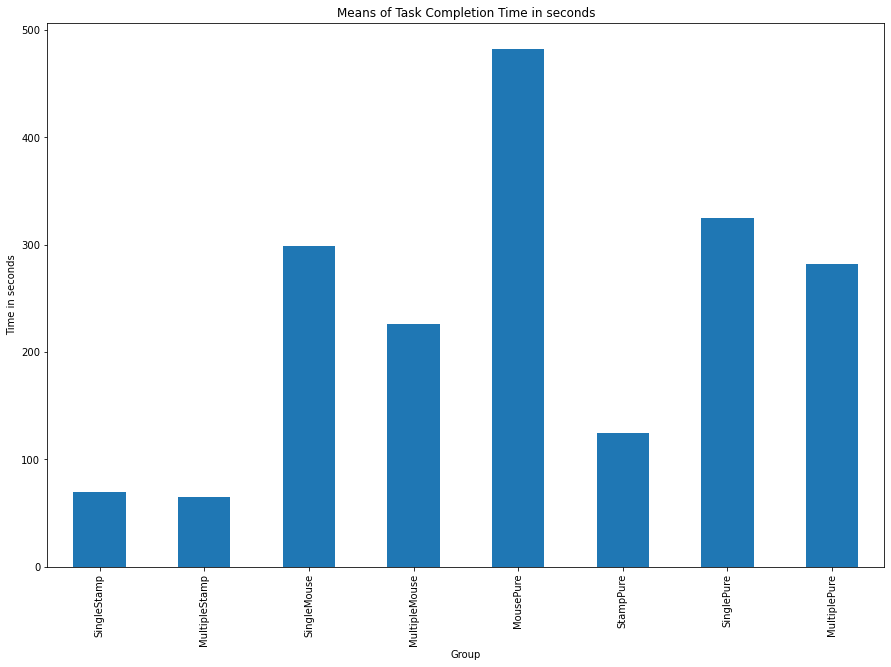

In [17]:
TCTs.mean().plot.bar(figsize = (15, 10), title="Means of Task Completion Time in seconds", ylabel = "Time in seconds", xlabel = "Group")